# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

  1) Which variables are significant in predicting the price of a house, and
  
  2) How well those variables describe the price of a house.
  
Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal 

    You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



In [1]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Hide the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Display all rows in output for entire code
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [3]:
# reading the dataset
houses = pd.read_csv("train.csv")

In [4]:
# We will start with some basic understanding about the given data
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Checking complete data size and attributes
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Handling data content in various columns as per data description provided:
houses.Alley = houses.Alley.fillna("No_Alley")
houses['Age'] = 2021 - houses.YearBuilt              # converting year into number of years
houses['RemodAge'] = 2021 - houses.YearRemodAdd      # converting year into number of years
houses.BsmtQual = houses.BsmtQual.fillna("No_Base")
houses.BsmtCond = houses.BsmtCond.fillna("No_Base")
houses.BsmtExposure = houses.BsmtExposure.fillna("No_Base")
houses.BsmtFinType1 = houses.BsmtFinType1.fillna("No_Base1")
houses.BsmtFinType2 = houses.BsmtFinType2.fillna("No_Base2")
houses.FireplaceQu = houses.FireplaceQu.fillna("No_Fire")
houses.GarageType = houses.GarageType.fillna("No_Garage")
houses.GarageYrBlt = houses.GarageYrBlt.fillna("No_Garage")
# converting year into number of years. No garage is replaced by 300 years in order to retain the column as numerical
houses['GarageAge'] = houses['GarageYrBlt'].apply(lambda x: 300 if x == "No_Garage" else (2021 - x))
houses.GarageFinish = houses.GarageFinish.fillna("No_Garage")
houses.GarageQual = houses.GarageQual.fillna("No_Garage")
houses.GarageCond = houses.GarageCond.fillna("No_Garage")
houses.PoolQC = houses.PoolQC.fillna("No_Pool")
houses.Fence = houses.Fence.fillna("No_Fence")
houses.MiscFeature = houses.MiscFeature.fillna("None")

# Month & Year of sale will be the current date for a new prediction.
# This means even if these variables are converted into age, it will not impact our prediction.
# This is because the sale month & year of new prediction would be current date.
# The company would e predicting prices of houses which it would intend to buy, that is on that day or current day.
# Therefore, we can drop month & year of sale.

# Dropping the year columns which are converted into new columns
# Dropping 'TotalBsmtSF','GrLivArea' as they are just sum of other columns and would not add any value to analysis
houses.drop(['Id','YearBuilt','YearRemodAdd','TotalBsmtSF','GrLivArea','GarageYrBlt','MoSold','YrSold'],axis=1,inplace=True)

In [7]:
# Data Content Validation
# COndition 1 & Condition 2 do not have any null values. This means all houses have atleast 2 proximity items
# Check if any house has same element mentioned twice
houses[(houses.Condition1 == houses.Condition2)].shape

(1265, 76)

In [8]:
# Since same proximity item cannot be marked twice, we will replace Condition2 with value as 'None' if it is similar to condition1
houses.loc[houses.Condition1 == houses.Condition2,'Condition2'] = 'None'
# We will do a similar setup for Exterior2nd as it will be similar to Exterior1st, if it is not remodelled.
houses.loc[houses.Exterior1st == houses.Exterior2nd,'Exterior2nd'] = 'None'

In [9]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  RoofStyl

In [10]:
# Adjusting the data type of each column where required

cat_cols = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope', \
            'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond', \
            'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType', 'ExterQual', 'ExterCond', \
            'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', \
            'HeatingQC','CentralAir', 'Electrical', 'KitchenQual','Functional','FireplaceQu', 'GarageType', \
             'GarageFinish','GarageQual', 'GarageCond', 'PavedDrive','PoolQC','Fence','MiscFeature', \
            'SaleType','SaleCondition']
num_cols = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', \
           '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', \
            'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageCars','GarageArea','WoodDeckSF', 'OpenPorchSF', \
            'EnclosedPorch','3SsnPorch','ScreenPorch', 'PoolArea','MiscVal', 'SalePrice', 'Age', 'RemodAge','GarageAge']
houses[cat_cols] = houses[cat_cols].astype('category')

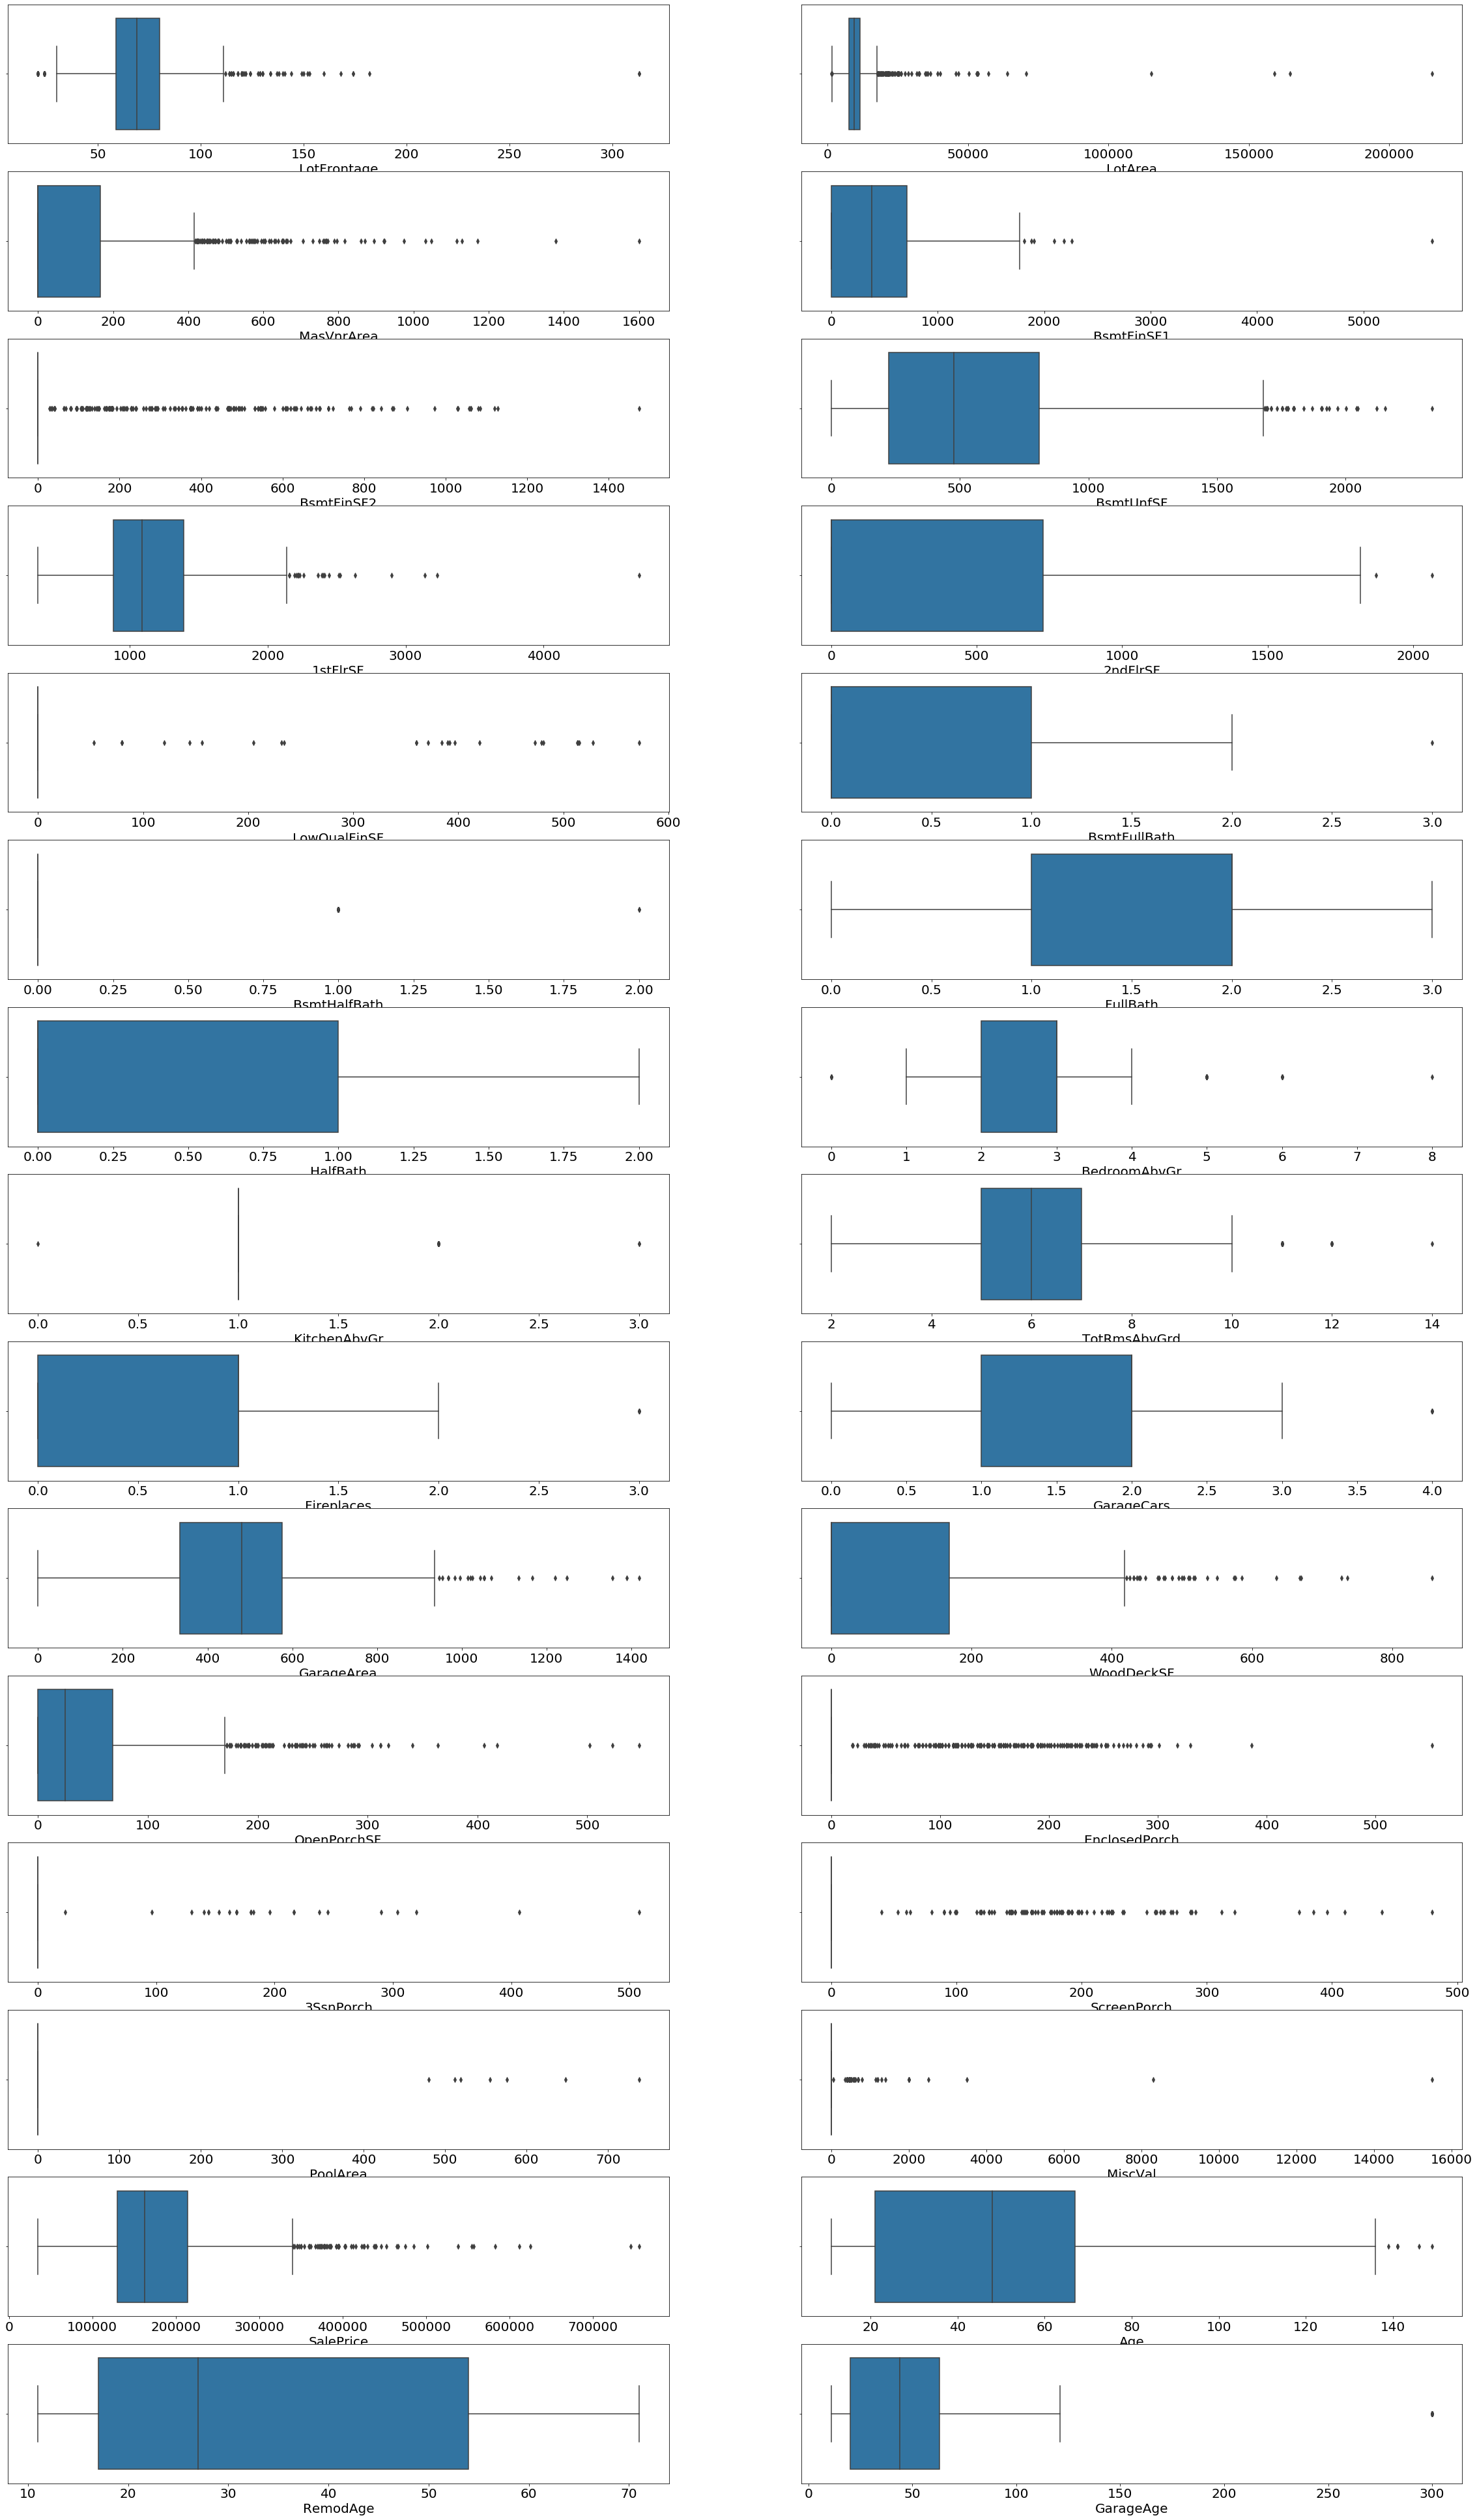

In [11]:
# CHecking for outliers
plt.figure(figsize=(40,70))
for item,i in enumerate(num_cols):
    plt.subplot(15,2,(item+1))
    sns.boxplot(data=houses,x=i)
    plt.tick_params(labelsize=20)
    plt.xlabel(i,fontsize=20)

In [12]:
# Dropping Outliers:
houses = houses[houses.LotFrontage <=300]
houses = houses[houses.LotArea <=100000]
houses = houses[houses.MasVnrArea <=1300]
houses = houses[houses.BsmtFinSF1 <=5000]
houses = houses[houses.BsmtFinSF2 <=1400]
houses = houses[houses.BsmtUnfSF <=2300]
houses = houses[houses['1stFlrSF'] <=4000]
houses = houses[houses['2ndFlrSF'] <=2000]
houses = houses[houses.BsmtFullBath <3]
houses = houses[houses.BedroomAbvGr < 8]
houses = houses[houses.TotRmsAbvGrd < 14]
houses = houses[houses.WoodDeckSF < 800]
houses = houses[houses.OpenPorchSF < 500]
houses = houses[houses.EnclosedPorch < 500]
houses = houses[houses['3SsnPorch'] < 400]
houses = houses[houses.MiscVal < 8000]
houses = houses[houses.GarageArea < 1300]
houses = houses[houses.SalePrice < 700000]
houses = houses[houses.Age < 140]

houses.reset_index(inplace=True,drop=True)
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1170 non-null   category
 1   MSZoning       1170 non-null   category
 2   LotFrontage    1170 non-null   float64 
 3   LotArea        1170 non-null   int64   
 4   Street         1170 non-null   category
 5   Alley          1170 non-null   category
 6   LotShape       1170 non-null   category
 7   LandContour    1170 non-null   category
 8   Utilities      1170 non-null   category
 9   LotConfig      1170 non-null   category
 10  LandSlope      1170 non-null   category
 11  Neighborhood   1170 non-null   category
 12  Condition1     1170 non-null   category
 13  Condition2     1170 non-null   category
 14  BldgType       1170 non-null   category
 15  HouseStyle     1170 non-null   category
 16  OverallQual    1170 non-null   category
 17  OverallCond    1170 non-null   ca

In [13]:
missing_data = pd.DataFrame({'Column_Name':houses.columns,'Type':houses.dtypes,'Missing_%':houses.isnull().sum()/len(houses)*100})
missing_data[missing_data['Missing_%'] > 0]

,Column_Name,Type,Missing_%
Electrical,Electrical,category,0.08547


In [14]:
# Analyzing blank entry columns to take action
# We will impute the Electrical column with mode as for categorical columns
houses['Electrical']=houses['Electrical'].fillna(houses['Electrical'].mode().iloc[0])

In [15]:
# Re-checking for percentage of missing/blank entries
blank_data = round(houses.isnull().sum() / len(houses.index),2)
blank_data[blank_data != 0]

Series([], dtype: float64)

In [16]:
# Checking for columns have same values which will not help with model built as it lacks uniquness:
df_freq = pd.DataFrame(columns = ['Percentage','element','Feature'])
for i in houses.columns:
    feature_values = houses[i].value_counts(normalize=True) * 100 
    feature_values_df = feature_values.to_frame()
    feature_values_df['element'] = feature_values_df.index
    feature_values_df['Feature'] = feature_values_df.columns[0]
    feature_values_df.rename(columns={feature_values_df.columns[0]: "Percentage"},inplace=True)
    df_freq = df_freq.append(feature_values_df,ignore_index=True)

# Collecting the column names with more than 85% of data being exactly same
drop_col_list = df_freq[df_freq.Percentage > 85].Feature.tolist()

# Removing the column details from frequency dataframe also:
drop_index = df_freq[df_freq.Feature.isin(drop_col_list)].index
df_freq.drop(drop_index,inplace=True)

# Dropping columns selected above:
houses.drop(drop_col_list,axis=1,inplace=True)
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1170 non-null   category
 1   MSZoning       1170 non-null   category
 2   LotFrontage    1170 non-null   float64 
 3   LotArea        1170 non-null   int64   
 4   LotShape       1170 non-null   category
 5   LotConfig      1170 non-null   category
 6   Neighborhood   1170 non-null   category
 7   BldgType       1170 non-null   category
 8   HouseStyle     1170 non-null   category
 9   OverallQual    1170 non-null   category
 10  OverallCond    1170 non-null   category
 11  RoofStyle      1170 non-null   category
 12  Exterior1st    1170 non-null   category
 13  MasVnrType     1170 non-null   category
 14  MasVnrArea     1170 non-null   float64 
 15  ExterQual      1170 non-null   category
 16  Foundation     1170 non-null   category
 17  BsmtQual       1170 non-null   ca

In [17]:
# Displayign the presence of unique values in the dataframe:
df_freq

,Percentage,element,Feature
0,36.495726,20,MSSubClass
1,18.974359,60,MSSubClass
2,10.769231,50,MSSubClass
3,5.641026,120,MSSubClass
4,5.299145,30,MSSubClass
5,4.700855,160,MSSubClass
6,4.358974,70,MSSubClass
7,3.931624,90,MSSubClass
8,3.247863,80,MSSubClass
9,2.222222,190,MSSubClass


In [18]:
# Reseting the list of category columns:
cat_cols = list(houses.select_dtypes(exclude=['int64','float64']).columns)

# Checking if any of the categories can be clubbed if their presence is very low into common items:
df_freq_cat = df_freq[df_freq.Feature.isin(cat_cols)]

# Creating a dataframe including only categories which represent less than 5% of data in the column
df_freq_drop = df_freq_cat[df_freq_cat['Percentage'] <5.0]

# Iterating through all elements having low presence and replacing them with value as "Other" as the same is not used at all
for index,r in df_freq_drop.iterrows():
    houses[r.Feature] = houses[r.Feature].apply(lambda x: "Other" if x == r.element else x)

In [19]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1170 non-null   object  
 1   MSZoning       1170 non-null   object  
 2   LotFrontage    1170 non-null   float64 
 3   LotArea        1170 non-null   int64   
 4   LotShape       1170 non-null   object  
 5   LotConfig      1170 non-null   object  
 6   Neighborhood   1170 non-null   object  
 7   BldgType       1170 non-null   object  
 8   HouseStyle     1170 non-null   object  
 9   OverallQual    1170 non-null   object  
 10  OverallCond    1170 non-null   object  
 11  RoofStyle      1170 non-null   object  
 12  Exterior1st    1170 non-null   object  
 13  MasVnrType     1170 non-null   category
 14  MasVnrArea     1170 non-null   float64 
 15  ExterQual      1170 non-null   object  
 16  Foundation     1170 non-null   object  
 17  BsmtQual       1170 non-null   ob

In [20]:
cat_cols = list(houses.select_dtypes(exclude=['int64','float64']).columns)
num_cols = list(houses.select_dtypes(include=['int64','float64']).columns)
houses[cat_cols] = houses[cat_cols].astype('category')
houses[num_cols].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Age,RemodAge,GarageAge
count,1170.000000,1170.000000,1170.00000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000
mean,69.250427,9623.111966,99.24359,418.597436,585.535043,1146.521368,336.329060,0.405983,1.556410,0.367521,2.852991,6.504274,0.565812,1.759829,469.291453,88.784615,44.248718,178251.858974,50.085470,35.980342,57.717949
std,21.706646,4801.427359,172.08057,433.306869,443.556990,365.122054,421.731561,0.508405,0.543078,0.499757,0.788451,1.600491,0.622801,0.769117,215.193508,118.296584,61.223654,78306.702050,31.036768,21.263722,65.621050
min,21.000000,1300.000000,0.00000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35311.000000,11.000000,11.000000,11.000000
25%,59.000000,7392.500000,0.00000,0.000000,245.250000,872.500000,0.000000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,308.250000,0.000000,0.000000,127500.000000,18.000000,17.000000,18.000000
50%,69.000000,9205.000000,0.00000,351.000000,505.000000,1077.000000,0.000000,0.000000,2.000000,0.000000,3.000000,6.000000,0.000000,2.000000,476.500000,0.000000,24.000000,157250.000000,49.000000,26.000000,43.500000
75%,80.000000,11199.500000,159.50000,686.000000,829.000000,1370.000000,716.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,65.750000,210750.000000,71.000000,56.000000,65.000000
max,182.000000,70761.000000,1129.00000,2260.000000,2153.000000,3138.000000,1611.000000,2.000000,3.000000,2.000000,6.000000,12.000000,3.000000,4.000000,1248.000000,736.000000,418.000000,611657.000000,139.000000,71.000000,300.000000


<Figure size 28800x5040 with 0 Axes>

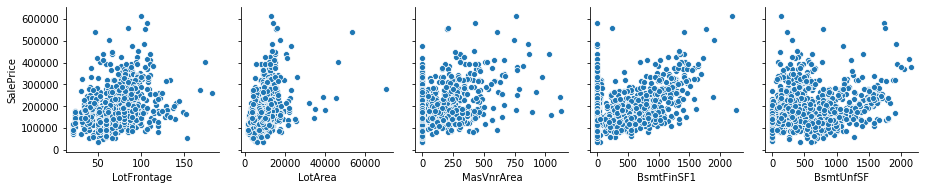

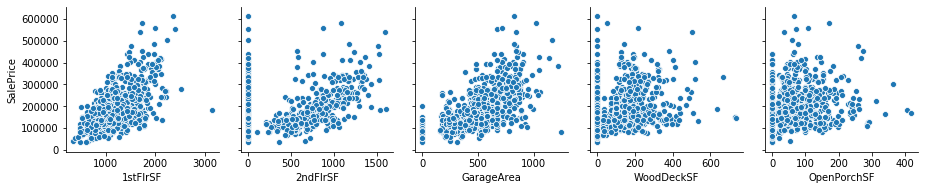

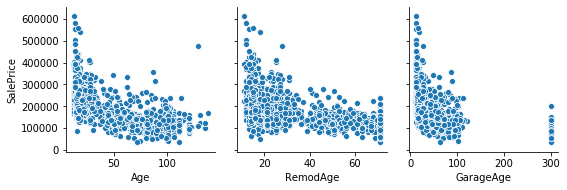

In [21]:
# Visuavilizing true numeric variables against target variable SalePrice (excluding columns like number of bedrooms, etc.)
plt.figure(figsize=(400,70))
sns.pairplot(houses,y_vars=['SalePrice'],x_vars=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1', 'BsmtUnfSF'])
sns.pairplot(houses,y_vars=['SalePrice'],x_vars=['1stFlrSF','2ndFlrSF','GarageArea','WoodDeckSF','OpenPorchSF'])
sns.pairplot(houses,y_vars=['SalePrice'],x_vars=['Age','RemodAge','GarageAge'])

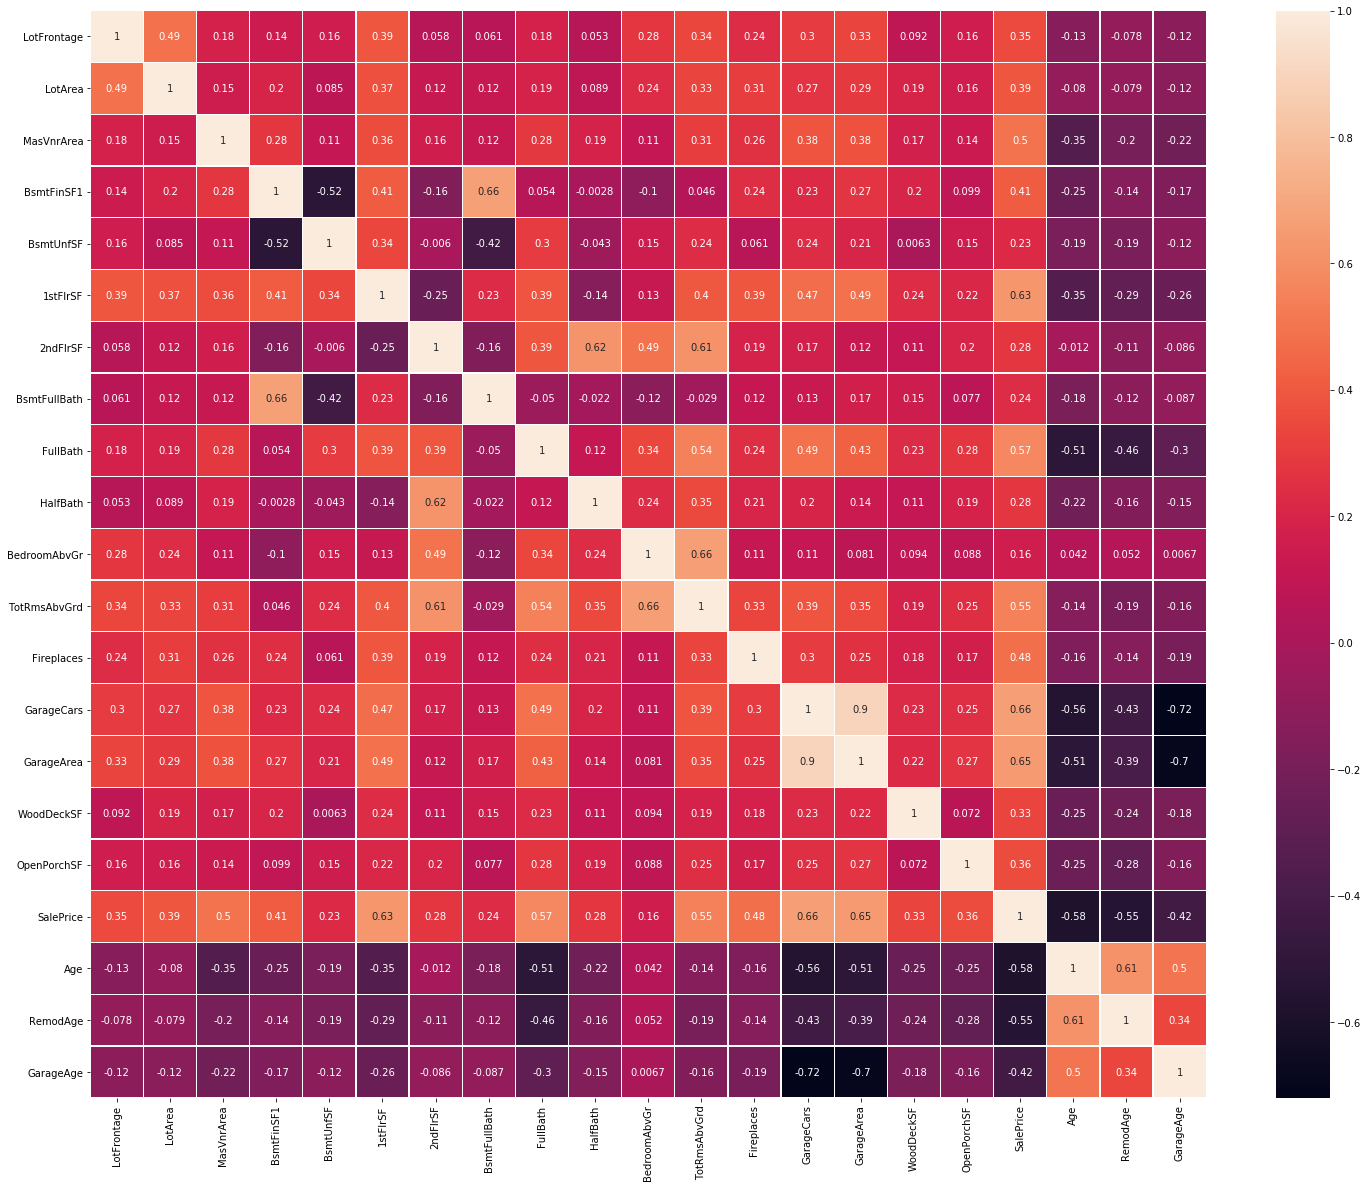

In [22]:
# Checking for collinear independent numeric variables
plt.figure(figsize=(25,20))
sns.heatmap(houses[num_cols].corr(),annot=True,linewidths=0.2)
plt.show()

In [23]:
# BedroomAbvGr has a very low correlation with SalePrice and hence dropping it
houses.drop(['BedroomAbvGr'],axis=1,inplace=True)
num_cols.remove('BedroomAbvGr')

In [24]:
# Showcasing the factors with high correlation not to miss out in the huge picture above
corr_matrix = houses[num_cols].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Replacing all correlation value of 1 to avoid displayign same features
corr_matrix = corr_matrix.replace(1,0)

for i in to_drop:
    print("Parameter: ",i,"\nLinked Factors: \n",corr_matrix.loc[corr_matrix[i] > 0.7,i],"\n")

Parameter:  GarageArea 
Linked Factors: 
 GarageCars    0.895466
Name: GarageArea, dtype: float64 

Parameter:  GarageAge 
Linked Factors: 
 GarageCars    0.71999
Name: GarageAge, dtype: float64 



In [25]:
# We will drop feature GarageCars as it is positively correlated to 2 other features
houses.drop(['GarageCars'],axis=1,inplace=True)
num_cols.remove('GarageCars')

In [26]:
# Running correlation check again
corr_matrix = houses[num_cols].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
print(to_drop)

# Replacing all correlation value of 1 to avoid displayign same features
corr_matrix = corr_matrix.replace(1,0)

for i in to_drop:
    print("Parameter: ",i,"\nLinked Factors: \n",corr_matrix.loc[corr_matrix[i] > 0.7,i],"\n")

[]


In [27]:
# Creating dummy variables as a preparation for Model setup
houses_dummy = pd.get_dummies(data = houses, columns = cat_cols, drop_first=True)

In [28]:
# Splitting data into train & test sets
h_train, h_test = train_test_split(houses_dummy, train_size = 0.7, test_size = 0.3, random_state = 100)

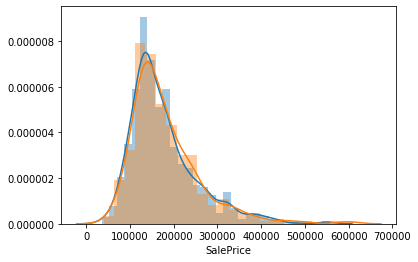

In [29]:
# Validating if the data split looks similar
sns.distplot(h_train.SalePrice)
sns.distplot(h_test.SalePrice)

In [30]:
h_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Age,RemodAge,GarageAge,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSSubClass_Other,MSZoning_RL,MSZoning_RM,LotShape_Other,LotShape_Reg,LotConfig_Inside,LotConfig_Other,Neighborhood_Edwards,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Somerst,BldgType_Other,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Other,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_Other,RoofStyle_Hip,RoofStyle_Other,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Other,ExterQual_TA,Foundation_CBlock,Foundation_Other,Foundation_PConc,BsmtQual_Gd,BsmtQual_Other,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Other,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_Other,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,KitchenQual_Other,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_No_Fire,FireplaceQu_Other,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No_Garage,GarageType_Other,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_No_Fence,Fence_Other,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
265,60.0,6402,0.0,0,596,596,596,0,1,0,6,0,189,0,0,78000,101,71,101.0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0
816,60.0,7200,0.0,247,310,1022,0,1,1,0,4,0,280,0,30,85000,111,15,65.0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0
227,83.0,10005,299.0,392,768,1156,866,0,2,1,8,1,505,288,117,192000,44,44,44.0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
247,70.0,9800,0.0,894,0,894,0,1,1,0,5,0,552,256,0,149900,49,49,46.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
814,75.0,9825,0.0,0,0,1664,0,0,2,0,8,0,0,0,0,100000,56,56,300.0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0


In [31]:
# Scaling the data for model build
scaler = MinMaxScaler()
h_train[num_cols] = scaler.fit_transform(h_train[num_cols])
h_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Age,RemodAge,GarageAge,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSSubClass_Other,MSZoning_RL,MSZoning_RM,LotShape_Other,LotShape_Reg,LotConfig_Inside,LotConfig_Other,Neighborhood_Edwards,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_Somerst,BldgType_Other,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_Other,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_Other,RoofStyle_Hip,RoofStyle_Other,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Other,ExterQual_TA,Foundation_CBlock,Foundation_Other,Foundation_PConc,BsmtQual_Gd,BsmtQual_Other,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_Other,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_Other,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,KitchenQual_Other,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_No_Fire,FireplaceQu_Other,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No_Garage,GarageType_Other,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_No_Fence,Fence_Other,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
265,0.242236,0.073451,0.000000,0.000000,0.281000,0.119635,0.369957,0.0,0.333333,0.0,0.4,0.0,0.151442,0.000000,0.000000,0.081894,0.720,1.000000,0.311419,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0
816,0.242236,0.084940,0.000000,0.139785,0.146157,0.314155,0.000000,0.5,0.333333,0.0,0.2,0.0,0.224359,0.000000,0.071770,0.095323,0.800,0.066667,0.186851,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0
227,0.385093,0.125322,0.264836,0.221845,0.362093,0.375342,0.537554,0.0,0.666667,0.5,0.6,0.5,0.404647,0.431138,0.279904,0.300591,0.264,0.550000,0.114187,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
247,0.304348,0.122371,0.000000,0.505942,0.000000,0.255708,0.000000,0.5,0.333333,0.0,0.3,0.0,0.442308,0.383234,0.000000,0.219827,0.304,0.633333,0.121107,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
814,0.335404,0.122731,0.000000,0.000000,0.000000,0.607306,0.000000,0.0,0.666667,0.0,0.6,0.0,0.000000,0.000000,0.000000,0.124099,0.360,0.750000,1.000000,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0


In [32]:
# We will use RFE linear regression modelling to check with top 20 variables

# Creating X_train & y_train data:
y_train = h_train.pop('SalePrice')
X_train = h_train

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

X_train_rfe = X_train[X_train.columns[rfe.support_]]

lm = LinearRegression()
lm.fit(X_train_rfe, y_train)
print(lm.intercept_)
print(lm.coef_)

0.17249529729394603
[ 0.18481648  0.04731652  0.12659928  0.04601721  0.26867235  0.18743041
  0.04152678 -0.09066078 -0.04188945  0.044895    0.04655625  0.03055196
  0.03644381 -0.04523781 -0.06486409 -0.06208657 -0.08076975 -0.0421983
 -0.07019415  0.0352018 ]


In [33]:
# Applying scale to test data:
h_test[num_cols] = scaler.transform(h_test[num_cols])
y_test = h_test.pop('SalePrice')
X_test = h_test

In [34]:
# Validating the model built
X_test_rfe = X_test[X_test.columns[rfe.support_]]

y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

metric = []

r2_train_lr = r2_score(y_train, y_pred_train)
print("R square on train data:",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R square on test data:",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS on train data:",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS on test data:",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE on train data:",mse_train_lr)
metric.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE on test data:",mse_test_lr)
metric.append(mse_test_lr)

rmse_train_lr = mse_train_lr * 0.5
print("RMSE on train data:",rmse_train_lr)
metric.append(rmse_train_lr)

rmse_test_lr = mse_test_lr * 0.5
print("RMSE on test data:",rmse_test_lr)
metric.append(rmse_test_lr)

R square on train data: 0.8907257507460402
R square on test data: 0.7853185308623032
RSS on train data: 1.967605673595124
RSS on test data: 1.7939786140697231
MSE on train data: 0.002402448929908576
MSE on test data: 0.005111050182534824
RMSE on train data: 0.001201224464954288
RMSE on test data: 0.002555525091267412


Text(0.5, 0, 'Errors')

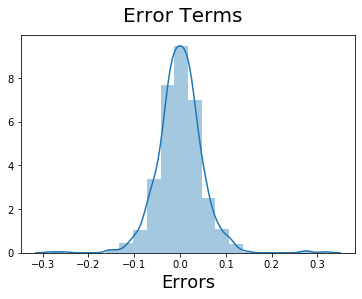

In [35]:
# Ploting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [36]:
# Applying Ridge Regression for fine tuning:

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 10
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    2.2s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [37]:
# Showcasing the best hyperparameter alpha for Ridge
model_cv.best_params_

{'alpha': 2.0}

In [38]:
#Fitting Ridge model for alpha = 2 and printing coefficients which have been penalised
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.13395063  0.05176254  0.13302414  0.05456342  0.23545424  0.17579859
  0.05514864 -0.08259435 -0.04190513  0.04817703  0.04936465  0.02883439
  0.03973466 -0.04131549 -0.06082712 -0.06047118 -0.0764927  -0.03909231
 -0.06861676  0.0364439 ]


In [39]:
# Validating the Ridge model built

y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []

r2_train_lr = r2_score(y_train, y_pred_train)
print("R square on train data:",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R square on test data:",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS on train data:",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS on test data:",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE on train data:",mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE on test data:",mse_test_lr)
metric2.append(mse_test_lr)

rmse_train_lr = mse_train_lr * 0.5
print("RMSE on train data:",rmse_train_lr)
metric2.append(rmse_train_lr)

rmse_test_lr = mse_test_lr * 0.5
print("RMSE on test data:",rmse_test_lr)
metric2.append(rmse_test_lr)

R square on train data: 0.8889839188538068
R square on test data: 0.7898008642666738
RSS on train data: 1.9989693144986838
RSS on test data: 1.7565221428574187
MSE on train data: 0.0024407439737468666
MSE on test data: 0.005004336589337376
RMSE on train data: 0.0012203719868734333
RMSE on test data: 0.002502168294668688


In [40]:
# Applying Lasso Regression for fine tuning:

lasso = Lasso()

# cross validation
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv1.fit(X_train_rfe, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    2.6s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [41]:
# Showcasing the best hyperparameter alpha for Lasso
model_cv1.best_params_

{'alpha': 0.0001}

In [42]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 
lasso.coef_

array([ 0.16622469,  0.04542967,  0.12440766,  0.04201862,  0.27271948,
        0.18701937,  0.04237125, -0.09032797, -0.04189716,  0.04572866,
        0.04832753,  0.02813872,  0.037479  , -0.04195493, -0.06129376,
       -0.05898302, -0.07594236, -0.03902581, -0.06734732,  0.03616086])

In [43]:
# Validating the Lasso model built

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []

r2_train_lr = r2_score(y_train, y_pred_train)
print("R square on train data:",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R square on test data:",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS on train data:",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS on test data:",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE on train data:",mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE on test data:",mse_test_lr)
metric3.append(mse_test_lr)

rmse_train_lr = mse_train_lr * 0.5
print("RMSE on train data:",rmse_train_lr)
metric3.append(rmse_train_lr)

rmse_test_lr = mse_test_lr * 0.5
print("RMSE on test data:",rmse_test_lr)
metric3.append(rmse_test_lr)

R square on train data: 0.8905383948629778
R square on test data: 0.7856340293325568
RSS on train data: 1.9709792268431374
RSS on test data: 1.7913421615119867
MSE on train data: 0.0024065680425435134
MSE on test data: 0.005103538921686572
RMSE on train data: 0.0012032840212717567
RMSE on test data: 0.002551769460843286


In [44]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)','RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.890726,0.888984,0.890538
1,R2 Score (Test),0.785319,0.789801,0.785634
2,RSS (Train),1.967606,1.998969,1.970979
3,RSS (Test),1.793979,1.756522,1.791342
4,MSE (Train),0.002402,0.002441,0.002407
5,MSE (Test),0.005111,0.005004,0.005104
6,RMSE (Train),0.001201,0.001220,0.001203
7,RMSE (Test),0.002556,0.002502,0.002552


In [45]:
# Ridge Model shows the best result
# Comparing coeffiencts across models:
df = {'Features':X_train_rfe.columns,'Linear':lm.coef_,'Ridge':ridge.coef_,'Lasso':lasso.coef_}
final_df = pd.DataFrame(data=df)
final_df

,Features,Linear,Ridge,Lasso
0,LotArea,0.184816,0.133951,0.166225
1,MasVnrArea,0.047317,0.051763,0.045430
2,BsmtFinSF1,0.126599,0.133024,0.124408
3,BsmtUnfSF,0.046017,0.054563,0.042019
4,1stFlrSF,0.268672,0.235454,0.272719
5,2ndFlrSF,0.187430,0.175799,0.187019
6,GarageArea,0.041527,0.055149,0.042371
7,Age,-0.090661,-0.082594,-0.090328
8,BldgType_Other,-0.041889,-0.041905,-0.041897
9,OverallQual_8,0.044895,0.048177,0.045729


In [46]:
# Looking at absolute coefficients to identify best features:
df2 = {'Features':X_train_rfe.columns,'Linear':abs(lm.coef_),'Ridge':abs(ridge.coef_),'Lasso':abs(lasso.coef_)}
final_df2 = pd.DataFrame(data=df2)
final_df2.sort_values('Ridge',ascending=False,inplace=True)
final_df2

,Features,Linear,Ridge,Lasso
4,1stFlrSF,0.268672,0.235454,0.272719
5,2ndFlrSF,0.187430,0.175799,0.187019
0,LotArea,0.184816,0.133951,0.166225
2,BsmtFinSF1,0.126599,0.133024,0.124408
7,Age,0.090661,0.082594,0.090328
16,KitchenQual_Other,0.080770,0.076493,0.075942
18,KitchenQual_TA,0.070194,0.068617,0.067347
14,BsmtQual_Other,0.064864,0.060827,0.061294
15,BsmtQual_TA,0.062087,0.060471,0.058983
6,GarageArea,0.041527,0.055149,0.042371


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

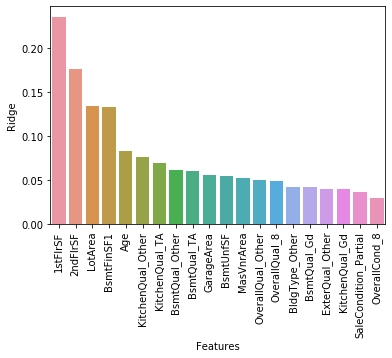

In [47]:
# Showcasing the most significant parameters based on Best Ridge Model
sns.barplot(data=final_df2,x='Features',y='Ridge',order=final_df2.Features)
plt.xticks(rotation=90)

In [48]:
# Final Linear Regression model can be represented as shown below:
Final_Mod = "SalePrice = "
i = 0
for index, row in final_df.iterrows():
    Final_Mod = Final_Mod + "( " + str(row[2]) + " * " + str(row[0]) + " ) + "
Final_Mod[0:-2]

'SalePrice = ( 0.13395063311722666 * LotArea ) + ( 0.05176253583249294 * MasVnrArea ) + ( 0.1330241400011875 * BsmtFinSF1 ) + ( 0.054563416883046896 * BsmtUnfSF ) + ( 0.23545423784022465 * 1stFlrSF ) + ( 0.1757985856448721 * 2ndFlrSF ) + ( 0.055148637477393084 * GarageArea ) + ( -0.08259435088787022 * Age ) + ( -0.04190513094689128 * BldgType_Other ) + ( 0.04817703479177332 * OverallQual_8 ) + ( 0.04936464680994943 * OverallQual_Other ) + ( 0.028834391844388706 * OverallCond_8 ) + ( 0.03973465506728504 * ExterQual_Other ) + ( -0.04131549032695075 * BsmtQual_Gd ) + ( -0.06082712145461078 * BsmtQual_Other ) + ( -0.060471181381373994 * BsmtQual_TA ) + ( -0.07649269627716693 * KitchenQual_Other ) + ( -0.03909230738703614 * KitchenQual_Gd ) + ( -0.06861676003505937 * KitchenQual_TA ) + ( 0.03644389827605511 * SaleCondition_Partial ) '

In [49]:
# Repeating the Ridge & Lasso model validation for double alpha value:

# Modified Ridge Model
alpha = 4.0
ridge1 = Ridge(alpha=alpha)

ridge1.fit(X_train_rfe, y_train)
print("Ridge Coefficients: ",ridge1.coef_)

# Modified Lasso Model
alpha =0.0002
lasso1 = Lasso(alpha=alpha)     
lasso1.fit(X_train_rfe, y_train) 
print("Lasso Coefficients: ",lasso1.coef_)

Ridge Coefficients:  [ 0.10919045  0.05480474  0.13239806  0.05558583  0.21242974  0.16521699
  0.06265253 -0.07740283 -0.04135735  0.05096162  0.0515485   0.02728367
  0.04206452 -0.03866315 -0.05919695 -0.05978555 -0.07275604 -0.03612356
 -0.06725673  0.03765866]
Lasso Coefficients:  [ 0.14763366  0.04354669  0.12221256  0.03802094  0.27675899  0.18660439
  0.04321815 -0.08999021 -0.04190375  0.04655643  0.05008656  0.02572441
  0.0385013  -0.03866947 -0.05772218 -0.05587786 -0.07115228 -0.03588751
 -0.06453531  0.03711679]


In [50]:
# New Metrics for 2nd Ridge Model:
# Validating the Ridge model built

y_pred_train = ridge1.predict(X_train_rfe)
y_pred_test = ridge1.predict(X_test_rfe)

metric4 = []

r2_train_lr = r2_score(y_train, y_pred_train)
print("R square on train data:",r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R square on test data:",r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS on train data:",rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS on test data:",rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE on train data:",mse_train_lr)
metric4.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE on test data:",mse_test_lr)
metric4.append(mse_test_lr)

rmse_train_lr = mse_train_lr * 0.5
print("RMSE on train data:",rmse_train_lr)
metric4.append(rmse_train_lr)

rmse_test_lr = mse_test_lr * 0.5
print("RMSE on test data:",rmse_test_lr)
metric4.append(rmse_test_lr)

R square on train data: 0.8856583889090016
R square on test data: 0.7910896093249109
RSS on train data: 2.0588492187925325
RSS on test data: 1.7457527872965883
MSE on train data: 0.0025138574100030922
MSE on test data: 0.0049736546646626445
RMSE on train data: 0.0012569287050015461
RMSE on test data: 0.0024868273323313222


In [51]:
# New Metrics for 2nd Lasso Model:
# Validating the Lasso model built

y_pred_train = lasso1.predict(X_train_rfe)
y_pred_test = lasso1.predict(X_test_rfe)

metric5 = []

r2_train_lr = r2_score(y_train, y_pred_train)
print("R square on train data:",r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R square on test data:",r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS on train data:",rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS on test data:",rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE on train data:",mse_train_lr)
metric5.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE on test data:",mse_test_lr)
metric5.append(mse_test_lr)

rmse_train_lr = mse_train_lr * 0.5
print("RMSE on train data:",rmse_train_lr)
metric5.append(rmse_train_lr)

rmse_test_lr = mse_test_lr * 0.5
print("RMSE on test data:",rmse_test_lr)
metric5.append(rmse_test_lr)

R square on train data: 0.889977289911779
R square on test data: 0.7856623499713072
RSS on train data: 1.9810825521278999
RSS on test data: 1.7911055010286243
MSE on train data: 0.002418904215052381
MSE on test data: 0.005102864675295226
RMSE on train data: 0.0012094521075261904
RMSE on test data: 0.002551432337647613


In [52]:
# Updating the Model Metrics dataframe
rg_metric2 = pd.Series(metric4, name = '2nd Ridge Regression')
ls_metric2 = pd.Series(metric5, name = '2nd Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric, rg_metric2, ls_metric2], axis = 1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,2nd Ridge Regression,2nd Lasso Regression
0,R2 Score (Train),0.890726,0.888984,0.890538,0.885658,0.889977
1,R2 Score (Test),0.785319,0.789801,0.785634,0.791090,0.785662
2,RSS (Train),1.967606,1.998969,1.970979,2.058849,1.981083
3,RSS (Test),1.793979,1.756522,1.791342,1.745753,1.791106
4,MSE (Train),0.002402,0.002441,0.002407,0.002514,0.002419
5,MSE (Test),0.005111,0.005004,0.005104,0.004974,0.005103
6,RMSE (Train),0.001201,0.001220,0.001203,0.001257,0.001209
7,RMSE (Test),0.002556,0.002502,0.002552,0.002487,0.002551


In [53]:
# Comparing coeffiencts against modified models:
df = {'Features':X_train_rfe.columns,'Linear':lm.coef_,'Ridge':ridge.coef_,'Lasso':lasso.coef_,'Ridge_new':ridge1.coef_,'Lasso_new':lasso1.coef_}
final_df = pd.DataFrame(data=df)
final_df

,Features,Linear,Ridge,Lasso,Ridge_new,Lasso_new
0,LotArea,0.184816,0.133951,0.166225,0.109190,0.147634
1,MasVnrArea,0.047317,0.051763,0.045430,0.054805,0.043547
2,BsmtFinSF1,0.126599,0.133024,0.124408,0.132398,0.122213
3,BsmtUnfSF,0.046017,0.054563,0.042019,0.055586,0.038021
4,1stFlrSF,0.268672,0.235454,0.272719,0.212430,0.276759
5,2ndFlrSF,0.187430,0.175799,0.187019,0.165217,0.186604
6,GarageArea,0.041527,0.055149,0.042371,0.062653,0.043218
7,Age,-0.090661,-0.082594,-0.090328,-0.077403,-0.089990
8,BldgType_Other,-0.041889,-0.041905,-0.041897,-0.041357,-0.041904
9,OverallQual_8,0.044895,0.048177,0.045729,0.050962,0.046556


In [54]:
# Building a 3rd Lasso model where the top 5 predictors in 1st lasso model are dropped:

new_X_train = X_train_rfe.drop(['1stFlrSF','2ndFlrSF','LotArea','BsmtFinSF1','Age'],axis=1) 
new_X_test = X_test_rfe.drop(['1stFlrSF','2ndFlrSF','LotArea','BsmtFinSF1','Age'],axis=1)

lasso2 = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso2, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(new_X_train, y_train)
model_cv.best_params_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    2.3s finished


{'alpha': 0.0001}

In [55]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(new_X_train, y_train) 
lasso2.coef_

array([ 0.14764977, -0.00940755,  0.18440869, -0.02620329,  0.07194519,
        0.05192576,  0.03391812,  0.04738214, -0.05746585, -0.15245316,
       -0.11220687, -0.15746406, -0.07545519, -0.12723879,  0.02424126])

In [56]:
# New Metrics for 3rd Lasso Model:
# Validating the Lasso model built

y_pred_train = lasso2.predict(new_X_train)
y_pred_test = lasso2.predict(new_X_test)

metric6 = []

r2_train_lr = r2_score(y_train, y_pred_train)
print("R square on train data:",r2_train_lr)
metric6.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R square on test data:",r2_test_lr)
metric6.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS on train data:",rss1_lr)
metric6.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS on test data:",rss2_lr)
metric6.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE on train data:",mse_train_lr)
metric6.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE on test data:",mse_test_lr)
metric6.append(mse_test_lr)

rmse_train_lr = mse_train_lr * 0.5
print("RMSE on train data:",rmse_train_lr)
metric6.append(rmse_train_lr)

rmse_test_lr = mse_test_lr * 0.5
print("RMSE on test data:",rmse_test_lr)
metric6.append(rmse_test_lr)

R square on train data: 0.7486894782827805
R square on test data: 0.7334341093270282
RSS on train data: 4.5251283970457745
RSS on test data: 2.227549070856381
MSE on train data: 0.005525187297980188
MSE on test data: 0.006346293649163478
RMSE on train data: 0.002762593648990094
RMSE on test data: 0.003173146824581739


In [57]:
# Updating the Model Metrics dataframe
ls_metric3 = pd.Series(metric6, name = '3rd Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric, rg_metric2, ls_metric2, ls_metric3], axis = 1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,2nd Ridge Regression,2nd Lasso Regression,3rd Lasso Regression
0,R2 Score (Train),0.890726,0.888984,0.890538,0.885658,0.889977,0.748689
1,R2 Score (Test),0.785319,0.789801,0.785634,0.791090,0.785662,0.733434
2,RSS (Train),1.967606,1.998969,1.970979,2.058849,1.981083,4.525128
3,RSS (Test),1.793979,1.756522,1.791342,1.745753,1.791106,2.227549
4,MSE (Train),0.002402,0.002441,0.002407,0.002514,0.002419,0.005525
5,MSE (Test),0.005111,0.005004,0.005104,0.004974,0.005103,0.006346
6,RMSE (Train),0.001201,0.001220,0.001203,0.001257,0.001209,0.002763
7,RMSE (Test),0.002556,0.002502,0.002552,0.002487,0.002551,0.003173


In [58]:
# Mapping coefficients to features:
df = {'Features':new_X_train.columns,'Lasso_new2':lasso2.coef_}
final_df = pd.DataFrame(data=df)
final_df

,Features,Lasso_new2
0,MasVnrArea,0.147650
1,BsmtUnfSF,-0.009408
2,GarageArea,0.184409
3,BldgType_Other,-0.026203
4,OverallQual_8,0.071945
5,OverallQual_Other,0.051926
6,OverallCond_8,0.033918
7,ExterQual_Other,0.047382
8,BsmtQual_Gd,-0.057466
9,BsmtQual_Other,-0.152453


The top 5 predictors with a lasso built from previous lasso model after ignoring the previous top 5 will include:
1)	GarageArea
2)	KitchenQual_Other
3)	BsmtQual_Other
4)	MasVnrArea
5)	KitchenQual_TA

In [59]:
# THe last Lasso model can be recreated from scratch using a fresh RFE model without the stated 5 original predictors
houses_dummy.drop(['1stFlrSF','2ndFlrSF','LotArea','BsmtFinSF1','Age'],axis=1,inplace=True)
num_cols.remove('1stFlrSF')
num_cols.remove('2ndFlrSF')
num_cols.remove('LotArea')
num_cols.remove('BsmtFinSF1')
num_cols.remove('Age')

# Splitting data into train & test sets
h_train1, h_test1 = train_test_split(houses_dummy, train_size = 0.7, test_size = 0.3, random_state = 100)

# Scaling the data for model build
scaler = MinMaxScaler()
h_train1[num_cols] = scaler.fit_transform(h_train1[num_cols])
h_train1.head()

# Creating X_train & y_train data:
y_train1 = h_train1.pop('SalePrice')
X_train1 = h_train1

lm1 = LinearRegression()
lm1.fit(X_train1, y_train1)

rfe1 = RFE(lm1, 20)
rfe1 = rfe1.fit(X_train1, y_train1)

X_train1_rfe = X_train1[X_train1.columns[rfe1.support_]]

lm1 = LinearRegression()
lm1.fit(X_train1_rfe, y_train1)
print(lm1.intercept_)
print(lm1.coef_)

0.19614618262604405
[ 0.0485254   0.08156717  0.06243589  0.10859778  0.04431954  0.15067297
  0.05876584  0.11365173  0.05005414 -0.04442452  0.05943753  0.06183735
 -0.0670182  -0.1204176  -0.09876336  0.04229881 -0.04466574 -0.11198886
 -0.06429012 -0.09935794]


R square on train data: 0.8487343854597386
R square on test data: 0.8064668083614839
RSS on train data: 2.7237074006114583
RSS on test data: 1.617253730872619
MSE on train data: 0.0033256500617966523
MSE on test data: 0.0046075604868165785
RMSE on train data: 0.0016628250308983262
RMSE on test data: 0.0023037802434082892


Text(0.5, 0, 'Errors')

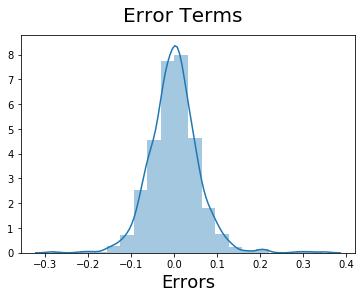

In [60]:
# Applying scale to test data:
h_test1[num_cols] = scaler.transform(h_test1[num_cols])
y_test1 = h_test1.pop('SalePrice')
X_test1 = h_test1

# Validating the model built
X_test1_rfe = X_test1[X_test1.columns[rfe1.support_]]

y_pred_train = lm1.predict(X_train1_rfe)
y_pred_test = lm1.predict(X_test1_rfe)

metric7 = []

r2_train_lr = r2_score(y_train1, y_pred_train)
print("R square on train data:",r2_train_lr)
metric7.append(r2_train_lr)

r2_test_lr = r2_score(y_test1, y_pred_test)
print("R square on test data:",r2_test_lr)
metric7.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train1 - y_pred_train))
print("RSS on train data:",rss1_lr)
metric7.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test1 - y_pred_test))
print("RSS on test data:",rss2_lr)
metric7.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train1, y_pred_train)
print("MSE on train data:",mse_train_lr)
metric7.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test1, y_pred_test)
print("MSE on test data:",mse_test_lr)
metric7.append(mse_test_lr)

rmse_train_lr = mse_train_lr * 0.5
print("RMSE on train data:",rmse_train_lr)
metric7.append(rmse_train_lr)

rmse_test_lr = mse_test_lr * 0.5
print("RMSE on test data:",rmse_test_lr)
metric7.append(rmse_test_lr)

# Ploting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train1 - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [61]:
# Building a 3rd Lasso model where the top 5 predictors in 1st lasso model are dropped:

lasso3 = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso3, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train1_rfe, y_train1)
print(model_cv.best_params_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 0.0001}


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    2.3s finished


In [62]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso3 = Lasso(alpha=alpha)
        
lasso3.fit(X_train1_rfe, y_train1) 
print(lasso3.coef_)

# New Metrics for 3rd Lasso Model:
# Validating the Lasso model built

y_pred_train = lasso3.predict(X_train1_rfe)
y_pred_test = lasso3.predict(X_test1_rfe)

metric8 = []

r2_train_lr = r2_score(y_train1, y_pred_train)
print("R square on train data:",r2_train_lr)
metric8.append(r2_train_lr)

r2_test_lr = r2_score(y_test1, y_pred_test)
print("R square on test data:",r2_test_lr)
metric8.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train1 - y_pred_train))
print("RSS on train data:",rss1_lr)
metric8.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test1 - y_pred_test))
print("RSS on test data:",rss2_lr)
metric8.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train1, y_pred_train)
print("MSE on train data:",mse_train_lr)
metric8.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test1, y_pred_test)
print("MSE on test data:",mse_test_lr)
metric8.append(mse_test_lr)

rmse_train_lr = mse_train_lr * 0.5
print("RMSE on train data:",rmse_train_lr)
metric8.append(rmse_train_lr)

rmse_test_lr = mse_test_lr * 0.5
print("RMSE on test data:",rmse_test_lr)
metric8.append(rmse_test_lr)

[ 0.04464207  0.08021667  0.0614869   0.10559666  0.04285178  0.15158894
  0.05965866  0.11488124  0.04660499 -0.04381321  0.05995371  0.0633628
 -0.06450264 -0.11748503 -0.09689753  0.04166523 -0.04277336 -0.10740816
 -0.06104858 -0.09681457]
R square on train data: 0.8485986626910191
R square on test data: 0.8061883922007305
RSS on train data: 2.7261512416041125
RSS on test data: 1.6195803063344383
MSE on train data: 0.003328633994632616
MSE on test data: 0.004614188906935722
RMSE on train data: 0.001664316997316308
RMSE on test data: 0.002307094453467861


In [63]:
# Updating the Model Metrics dataframe
ls_metric8 = pd.Series(metric8, name = '3rd Lasso Regression')

final_metric = pd.concat([lr_metric, ls_metric8], axis = 1)
final_metric

,Metric,Linear Regression,3rd Lasso Regression
0,R2 Score (Train),0.890726,0.848599
1,R2 Score (Test),0.785319,0.806188
2,RSS (Train),1.967606,2.726151
3,RSS (Test),1.793979,1.619580
4,MSE (Train),0.002402,0.003329
5,MSE (Test),0.005111,0.004614
6,RMSE (Train),0.001201,0.001664
7,RMSE (Test),0.002556,0.002307


In [64]:
# Mapping coefficients to features:
df = {'Features':X_train1_rfe.columns,'Lasso_new3':lasso3.coef_}
final_df = pd.DataFrame(data=df)
final_df

,Features,Lasso_new3
0,LotFrontage,0.044642
1,MasVnrArea,0.080217
2,BsmtFullBath,0.061487
3,FullBath,0.105597
4,HalfBath,0.042852
5,TotRmsAbvGrd,0.151589
6,Fireplaces,0.059659
7,GarageArea,0.114881
8,LotShape_Other,0.046605
9,BldgType_Other,-0.043813


The top 5 predictors with a lasso built from scratch will include:
1)	TotRmsAbvGrd
2)	BsmtQual_Other
3)	GarageArea
4)	KitchenQual_Other
5)	FullBath
